## Sentiment analysis
Emotions are one of the important aspects of politicians' speeches. It would be interesting to identify whether a certain quotation carries negative or positive emotions. This notebook aims to achieve that by performing sentiment analysis on the quotations.


In [3]:
# load the dataset
import pandas as pd
data = pd.read_pickle("../data/binary/us-politicians.pickle")
data.head()

,speaker_id,quote_id,quotation,speaker,party,Date-Time
0,1282411,2015-06-11-000090,25-year cost estimate for the U.S. nuclear mod...,Ed Markey,29552,2015-06-11
1,1282411,2015-08-11-090504,The state is transitioning to a higher percent...,Ed Markey,29552,2015-08-11
2,1282411,2015-10-27-125840,This highly coveted TIGER grant funding would ...,Ed Markey,29552,2015-10-27
3,1282411,2015-01-19-008025,carefully cutting the Gordian knot that has ti...,Ed Markey,29552,2015-01-19
4,1282411,2015-12-09-094134,The amendments would improve the safety of agi...,Ed Markey,29552,2015-12-09


In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

test_sentences = data[data["speaker"] == "Donald Trump"]["quotation"].sample(5).values.tolist()

for example in test_sentences:
  res = analyzer.polarity_scores(example)
  print(f"Sentence: {example}\nScores: {res}\n")

Sentence: So, we'll be doing the Moon but we'll really be doing Mars.
Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Sentence: I will spend lots of your money!
Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Sentence: I said, `Why would I want to be stuck in a room with a bunch of fake news liberals who hate me? '
Scores: {'neg': 0.302, 'neu': 0.653, 'pos': 0.045, 'compound': -0.8176}

Sentence: I'm sure they'll be open to any suggestions I have, because I think they'll be very fair suggestions.
Scores: {'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'compound': 0.5984}

Sentence: It was carried out poorly and the cover-up was one of the worst cover-ups in the history of cover-ups,
Scores: {'neg': 0.27, 'neu': 0.73, 'pos': 0.0, 'compound': -0.743}



In [17]:
from tqdm import tqdm
tqdm.pandas()
data["sentiment"] = data["quotation"].progress_apply(lambda x: analyzer.polarity_scores(x)["compound"])

100%|██████████| 1650105/1650105 [05:37<00:00, 4890.38it/s]


In [18]:
democratic_party = 29552
republican_party = 29468
democrats = data[data["party"] == democratic_party]
republicans = data[data["party"] == republican_party]
all_speakers = data.copy()

C:\Users\mstyc\AppData\Local\Temp/ipykernel_15896/696551056.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


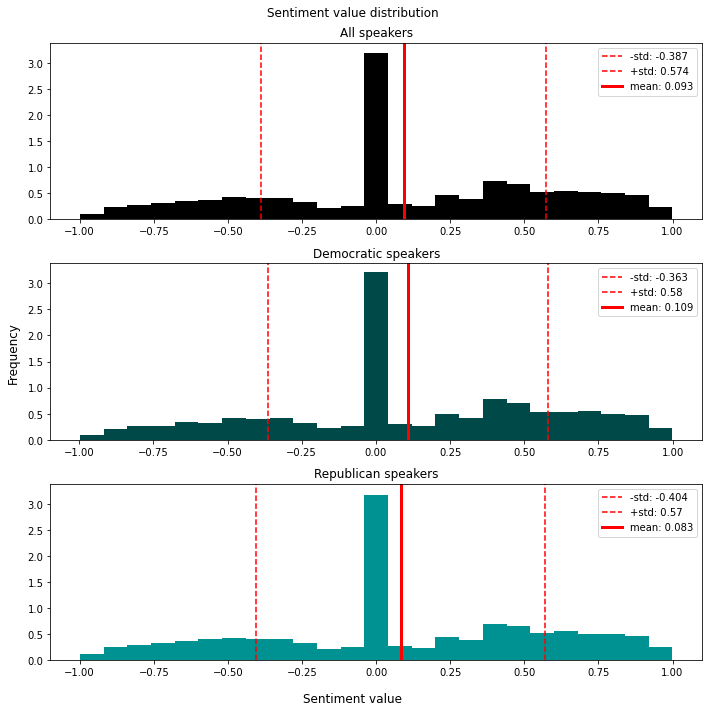

In [34]:
import matplotlib.pyplot as plt
import numpy as np

def vertical_subplots(columns, config):
    colours = ["#000000","#004949","#009292","#ff6db6","#ffb6db","#490092","#006ddb","#b66dff","#6db6ff","#b6dbff","#920000","#924900","#db6d00","#24ff24","#ffff6d"]
    means = [data.mean() for data in columns]
    stds = [data.std() for data in columns]

    fig, axs = plt.subplots(len(columns), 1, sharey = True)
    subtitles = config["subtitles"]


    for ax, data, mean, std, color, subtitle in zip(axs, columns, means, stds, colours, subtitles):
        ax.hist(data.values, color = color, bins=25, density=True)
        ax.axvline(mean - std, linestyle = '--', color = "red", label = f"-std: {np.round(mean - std, 3)}")
        ax.axvline(mean + std, linestyle = '--', color = "red", label = f"+std: {np.round(mean + std, 3)}")
        ax.axvline(mean, color = 'red', lw = 3, label = f"mean: {np.round(mean, 3)}")
        ax.set_title(subtitle)
        ax.legend()

    fig.supxlabel(config["xlabel"])
    fig.supylabel(config["ylabel"])
    fig.suptitle(config["title"])
    fig.set_size_inches(10, 10)
    fig.tight_layout()
    fig.show()

config = {
    "xlabel": "Sentiment value",
    "ylabel": "Frequency",
    "title": "Sentiment value distribution",
    "subtitles": ["All speakers", "Democratic speakers", "Republican speakers"]
}
columns = [all_speakers["sentiment"], democrats["sentiment"], republicans["sentiment"]]
vertical_subplots(columns, config)
    


In [35]:
from scipy.stats import ttest_ind
ttest_ind(democrats['sentiment'], republicans['sentiment'])

Ttest_indResult(statistic=33.84436165023326, pvalue=5.360467957219275e-251)

C:\Users\mstyc\AppData\Local\Temp/ipykernel_15896/696551056.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


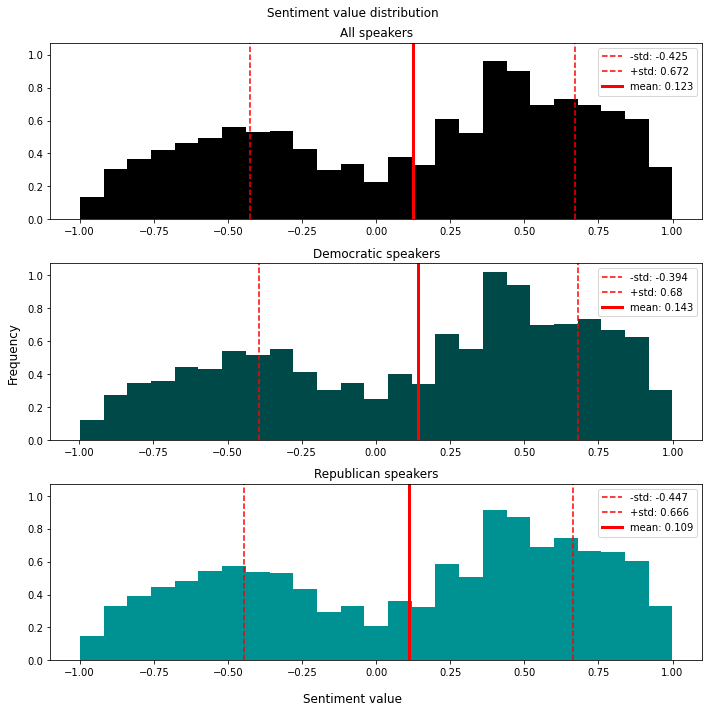

In [41]:
# now without the zero sentiment
groups = [all_speakers, democrats, republicans]
groups_nonzero = [group[group["sentiment"] != 0] for group in groups]
columns_nonzero = [group["sentiment"] for group in groups_nonzero]
vertical_subplots(columns_nonzero, config)